# Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_csv = pd.read_csv("realistic_ocean_climate_dataset.csv")
df = raw_csv.copy()
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,None,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,False


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  500 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [4]:
df.shape

(500, 9)

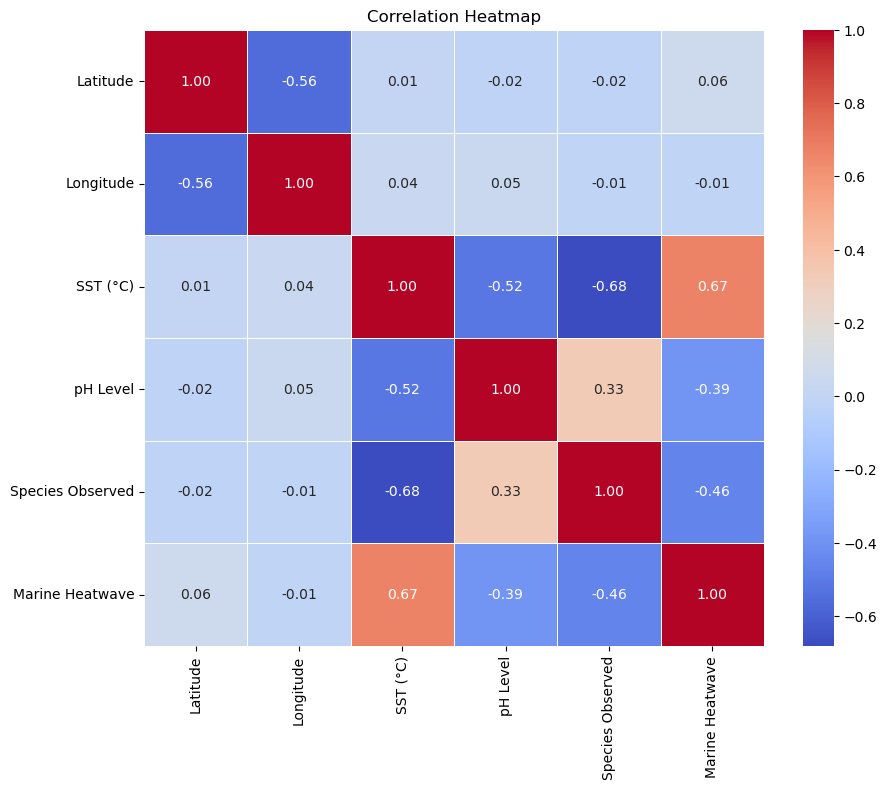

In [5]:
#correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


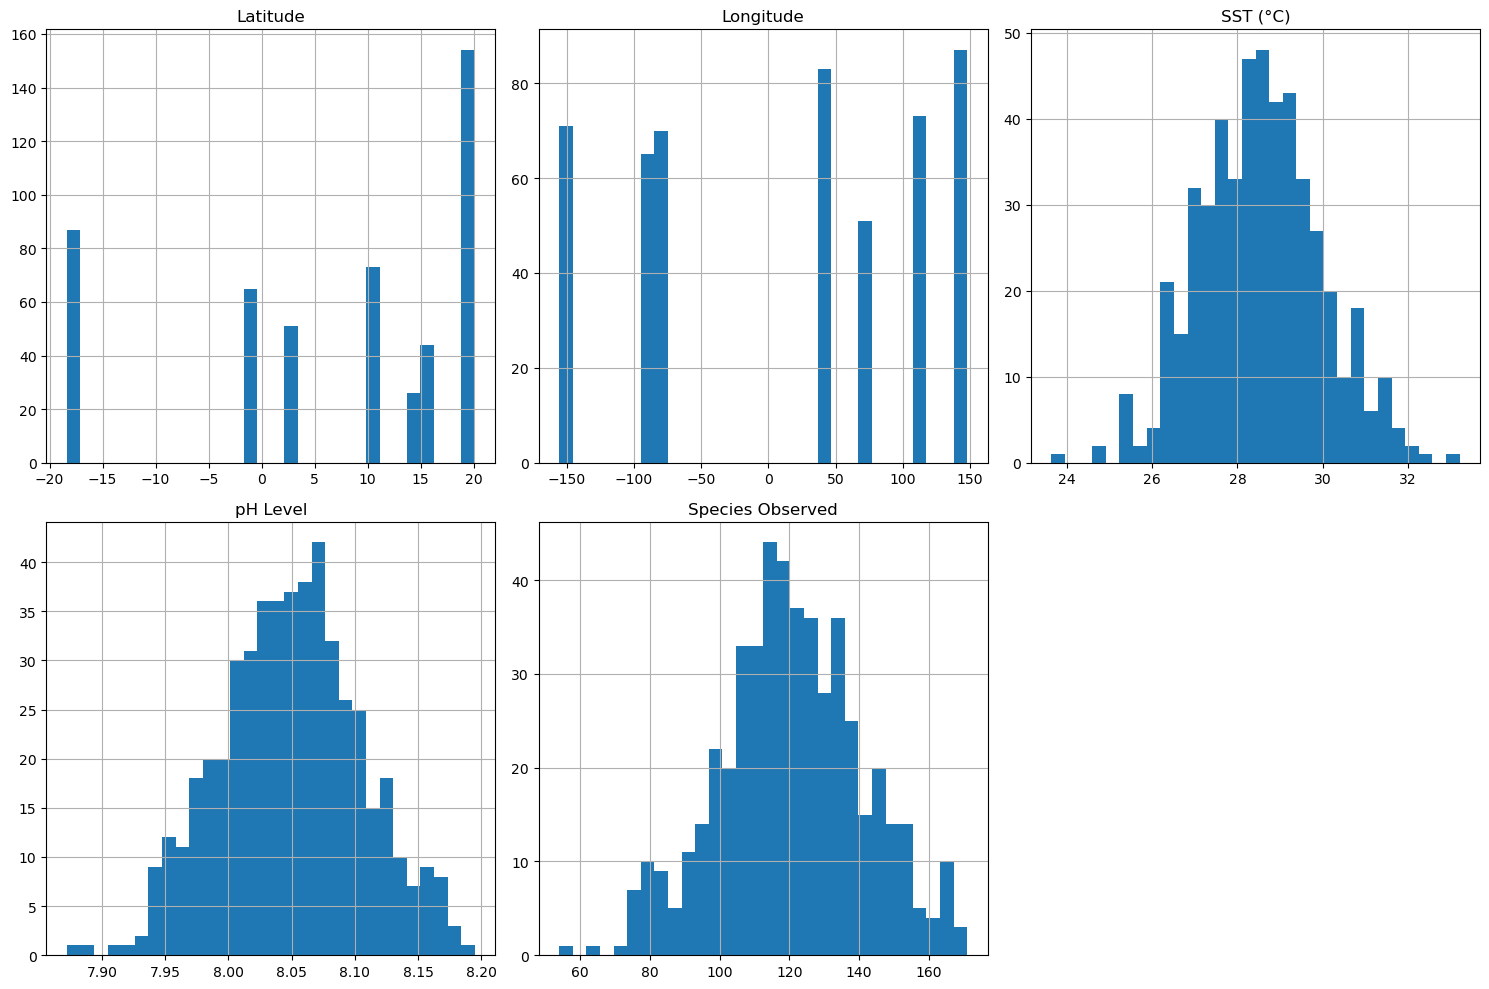

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram for each numeric feature
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(len(numeric_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()

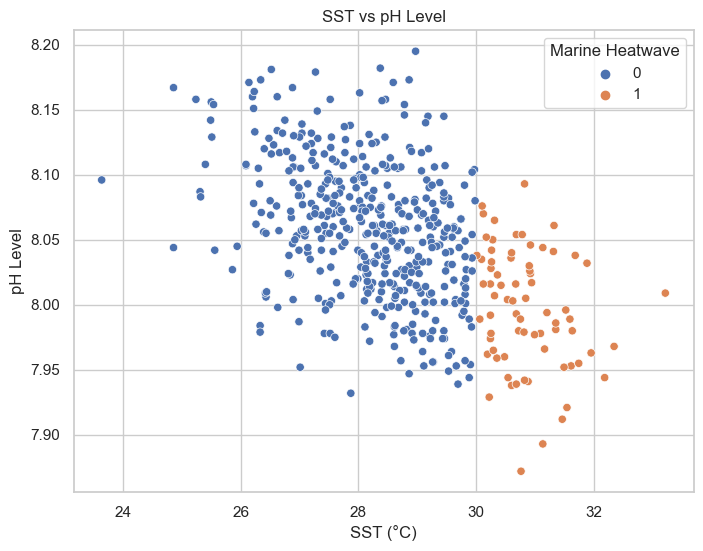

In [45]:
# 🌡️ SST vs pH
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SST (°C)', y='pH Level', hue='Marine Heatwave')
plt.title('SST vs pH Level')
plt.show()


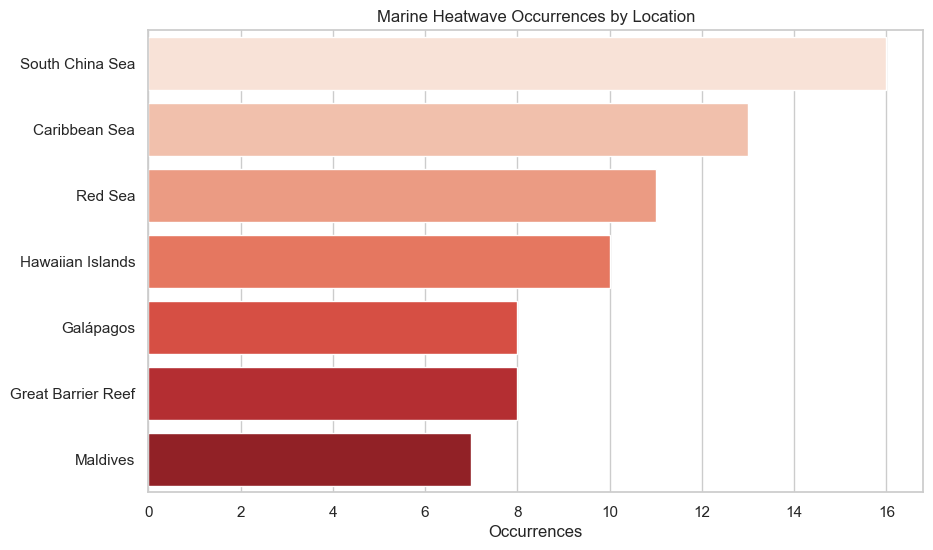

In [46]:
# 🔥 Marine Heatwaves by Location
plt.figure(figsize=(10, 6))
heatwave_counts = df[df['Marine Heatwave'] == True]['Location'].value_counts()
sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')
plt.title('Marine Heatwave Occurrences by Location')
plt.xlabel('Occurrences')
plt.show()


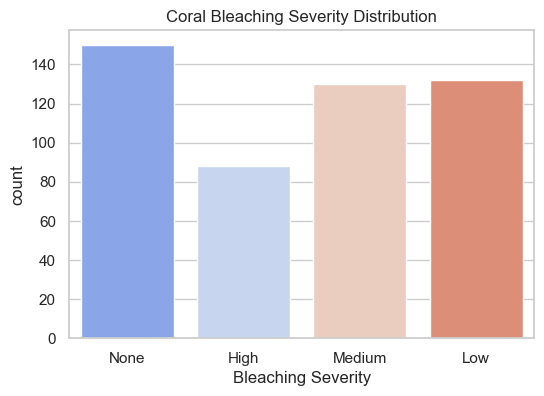

In [47]:
# 🪸 Bleaching Severity Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Bleaching Severity', data=df, palette='coolwarm')
plt.title('Coral Bleaching Severity Distribution')
plt.show()

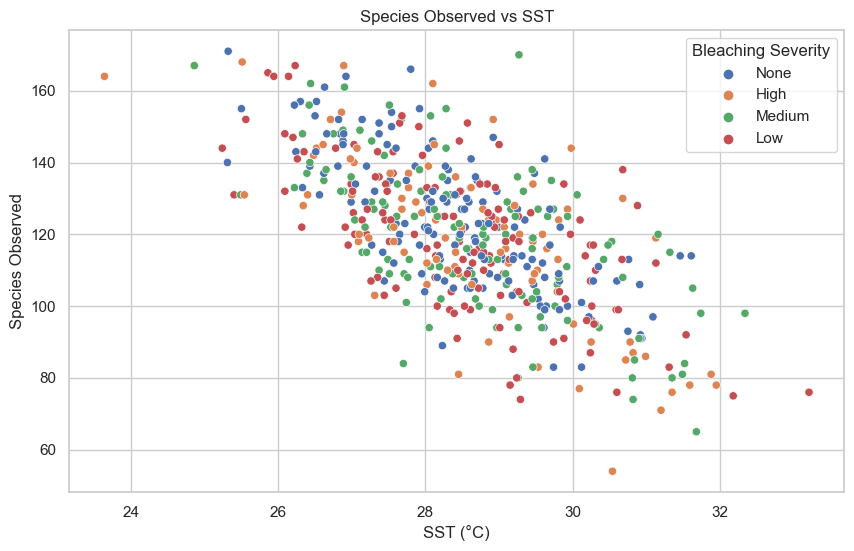

In [48]:
# 🐠 Species Observed vs SST
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SST (°C)', y='Species Observed', hue='Bleaching Severity')
plt.title('Species Observed vs SST')
plt.show()

In [49]:
# 🌍 Top Locations with High SST
top_sst = df.groupby('Location')['SST (°C)'].mean().sort_values(ascending=False).head(5)
print("📍 Locations with highest avg SST:\n", top_sst)


📍 Locations with highest avg SST:
 Location
South China Sea       28.866986
Caribbean Sea         28.681143
Maldives              28.543333
Great Barrier Reef    28.469195
Hawaiian Islands      28.424085
Name: SST (°C), dtype: float64


# Changing Marine Heatwave column to 0's & 1's

In [7]:
#replacing Marine Heatwave values with 0's and 1's as we consider them as targets.
df = df.replace({True: 1, False: 0})
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0


# Date 

In [8]:
type(df['Date'])

pandas.core.series.Series

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

list_years = []
for i in range(df.shape[0]):
    list_years.append(df['Date'][i].year)

In [10]:
df['Year'] = list_years
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0,2015
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0,2015
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0,2015
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0,2015
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0,2015


In [11]:
list_months = []
for i in range(df.shape[0]):
    list_months.append(df['Date'][i].month)

In [12]:
df['Month'] = list_months
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year,Month
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0,2015,1
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0,2015,1
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0,2015,1
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0,2015,1
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0,2015,1


In [13]:
df = df.drop(['Date'],axis=1)
df.head()

,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year,Month
0,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0,2015,1
1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0,2015,1
2,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0,2015,1
3,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0,2015,1
4,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0,2015,1


In [14]:
df.columns.values 

array(['Location', 'Latitude', 'Longitude', 'SST (°C)', 'pH Level',
       'Bleaching Severity', 'Species Observed', 'Marine Heatwave',
       'Year', 'Month'], dtype=object)

In [15]:
Column_names =['Year', 'Month','Location', 'Latitude', 'Longitude', 'SST (°C)', 'pH Level',
       'Bleaching Severity', 'Species Observed', 'Marine Heatwave']

df_date_mod = df[Column_names]
df_date_mod.head()

,Year,Month,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015,1,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0
1,2015,1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015,1,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015,1,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015,1,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0


### checkpoint

In [16]:
df_date_mod = df_date_mod.copy()
df_date_mod.head()

,Year,Month,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015,1,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0
1,2015,1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015,1,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015,1,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015,1,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0


# Location

In [17]:
df_date_mod['Location'].unique()

array(['Red Sea', 'Great Barrier Reef', 'Caribbean Sea', 'Galápagos',
       'South China Sea', 'Maldives', 'Hawaiian Islands'], dtype=object)

In [18]:
location_columns = pd.get_dummies(df_date_mod['Location'])
location_columns.head()

,Caribbean Sea,Galápagos,Great Barrier Reef,Hawaiian Islands,Maldives,Red Sea,South China Sea
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [19]:
location_columns.columns.values

array(['Caribbean Sea', 'Galápagos', 'Great Barrier Reef',
       'Hawaiian Islands', 'Maldives', 'Red Sea', 'South China Sea'],
      dtype=object)

In [20]:
location_rearr = ['Caribbean Sea','Great Barrier Reef','Maldives','South China Sea',
        'Hawaiian Islands','Galápagos',  'Red Sea']
location_columns = location_columns[location_rearr]  
location_columns.head()

,Caribbean Sea,Great Barrier Reef,Maldives,South China Sea,Hawaiian Islands,Galápagos,Red Sea
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0


In [21]:
Tropical_group = location_columns.iloc[:, 0:4].max(axis=1)
Islands_group = location_columns.iloc[:, 4:6].max(axis=1)
Red_Sea = location_columns.iloc[:, 6:].max(axis=1)

In [22]:
df_locations = pd.concat([df_date_mod,Tropical_group,Islands_group,Red_Sea], axis =1)
df_locations.head()

,Year,Month,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,0,1,2
0,2015,1,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0,0,0,1
1,2015,1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0,1,0,0
2,2015,1,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0,1,0,0
3,2015,1,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0,1,0,0
4,2015,1,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0,0,1,0


In [23]:
df_locations.columns.values

array(['Year', 'Month', 'Location', 'Latitude', 'Longitude', 'SST (°C)',
       'pH Level', 'Bleaching Severity', 'Species Observed',
       'Marine Heatwave', 0, 1, 2], dtype=object)

In [24]:
loc_columns = ['Year', 'Month', 'Location', 'Latitude', 'Longitude', 'SST (°C)',
       'pH Level', 'Bleaching Severity', 'Species Observed',
       'Marine Heatwave','Tropical_group','Islands_group', 'Red_Sea']
df_locations.columns = loc_columns
df_locations.head()

,Year,Month,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Tropical_group,Islands_group,Red_Sea
0,2015,1,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0,0,0,1
1,2015,1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0,1,0,0
2,2015,1,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0,1,0,0
3,2015,1,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0,1,0,0
4,2015,1,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0,0,1,0


In [25]:
loc_column_arr = ['Year', 'Month','Tropical_group','Islands_group', 'Red_Sea', 'Location', 'Latitude', 'Longitude', 'SST (°C)',
       'pH Level', 'Bleaching Severity', 'Species Observed',
       'Marine Heatwave']

df_locations_reordered = df_locations[loc_column_arr]
df_locations_reordered = df_locations_reordered.drop(['Location'],axis=1)
df_locations_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,None,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,None,110,0


### checkpoint

In [26]:
df_locations_reordered = df_locations_reordered.copy()
df_locations_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,None,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,None,110,0


# Bleaching Severity

In [27]:
df_locations_reordered['Bleaching Severity'].unique()

array(['None', 'High', 'Medium', 'Low'], dtype=object)

In [28]:
Bleaching_Severity_cols = pd.get_dummies(df_locations_reordered['Bleaching Severity'])
Bleaching_Severity_cols

,High,Low,Medium,None
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
495,0,0,1,0
496,0,0,1,0
497,0,1,0,0
498,0,0,1,0


In [29]:
df_locations_reordered = df_locations_reordered.drop(['Bleaching Severity'],axis=1)
df_locations_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,110,0


In [30]:
Bleaching_Severity_cols.columns.values

array(['High', 'Low', 'Medium', 'None'], dtype=object)

In [31]:
No_Bleaching  = Bleaching_Severity_cols.iloc[:, 0:1]
Low_to_Medium_Bleaching = Bleaching_Severity_cols.iloc[:, 1:3]
High_Bleaching = Bleaching_Severity_cols.iloc[:, 3:]

In [32]:
df_bleaching_reordered = pd.concat([df_locations_reordered,No_Bleaching,Low_to_Medium_Bleaching,High_Bleaching],axis=1)
df_bleaching_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,Species Observed,Marine Heatwave,High,Low,Medium,None
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,106,0,0,0,0,1
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,116,0,1,0,0,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,90,0,1,0,0,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,94,0,0,0,1,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,110,0,0,0,0,1


In [33]:
Bleaching_Severity_cols['Low_to_Medium_Bleaching'] = Bleaching_Severity_cols['Low'] + Bleaching_Severity_cols['Medium']

# Step 2: Drop the original Low and Medium columns as they're now combined
Bleaching_Severity_cols = Bleaching_Severity_cols.drop(['Low', 'Medium'], axis=1)

# Step 3: Concatenate the new 'Low_to_Medium_Bleaching' column with the original DataFrame
df_bleaching_reordered = pd.concat([df_locations_reordered, Bleaching_Severity_cols], axis=1)

# Display the result
df_bleaching_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,Species Observed,Marine Heatwave,High,None,Low_to_Medium_Bleaching
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,106,0,0,1,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,116,0,1,0,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,90,0,1,0,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,94,0,0,0,1
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,110,0,0,1,0


In [34]:
df_bleaching_reordered.columns.values

array(['Year', 'Month', 'Tropical_group', 'Islands_group', 'Red_Sea',
       'Latitude', 'Longitude', 'SST (°C)', 'pH Level',
       'Species Observed', 'Marine Heatwave', 'High', 'None',
       'Low_to_Medium_Bleaching'], dtype=object)

In [39]:
bleach_columns = ['Year', 'Month', 'Tropical_group', 'Islands_group', 'Red_Sea',
       'Latitude', 'Longitude', 'SST (°C)', 'pH Level','None','Low_to_Medium_Bleaching','High',
       'Species Observed', 'Marine Heatwave']

df_reordered = df_bleaching_reordered[bleach_columns]
df_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,None,Low_to_Medium_Bleaching,High,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,1,0,0,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,0,0,1,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,0,0,1,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,0,1,0,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,1,0,0,110,0


### checkpoint

In [41]:
df_bleach_reordered = df_reordered.copy()
df_bleach_reordered.head()

,Year,Month,Tropical_group,Islands_group,Red_Sea,Latitude,Longitude,SST (°C),pH Level,None,Low_to_Medium_Bleaching,High,Species Observed,Marine Heatwave
0,2015,1,0,0,1,20.0248,38.4931,29.47,8.107,1,0,0,106,0
1,2015,1,1,0,0,-18.2988,147.7782,29.65,8.004,0,0,1,116,0
2,2015,1,1,0,0,14.9768,-75.0233,28.86,7.947,0,0,1,90,0
3,2015,1,1,0,0,-18.3152,147.6486,28.97,7.995,0,1,0,94,0
4,2015,1,0,1,0,-0.8805,-90.9769,28.60,7.977,1,0,0,110,0


In [43]:
#storing the final dataset into .csv format
df_bleach_reordered.to_csv('Shifting_Seas_preprocessed.csv', index=False)